In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('../Ficheros/attack_limpieza2.csv', index_col = 0)

Por lo tanto, en este ejercicio tendremos que limpiar los outliers. 
1- ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [36]:
df['nuevas_edades'].unique()

array([nan, 14., 19., 20., 15., 21., 27., 36., 25.,  6., 16., 50., 13.,
       57., 11., 48., 18., 52., 12., 32., 10., 34., 30., 60., 33., 29.,
       54., 41., 37., 56., 69., 38., 55., 35., 46., 45., 40., 28., 24.,
       26., 49., 22.,  7., 31., 17., 42.,  3.,  8., 82., 73., 68., 51.,
       39., 58., 47., 61., 65., 66., 43.,  9., 72., 59., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1.,  2., 81., 78.])

In [37]:
df.sample(10)

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
1792,2004.10.30.a,2004,south africa,Chumming for white sharks,52,White,30-Oct-2004,Oct,n,M,52.0
1458,2008.01.29,2008,south africa,Surf-skiing,42,Unspecified,29-Jan-2008,Jan,n,M,42.0
973,2012.03.15,2012,usa,Surfing,61,Bull,15-Mar-2012,Mar,n,M,61.0
6092,1864.09.18.R,1864,france,Dragging a shark,NaN,Unspecified,Reported 18-Sep-1864,Sep,n,M,NaN
2681,1992.12.23,1992,usa,Lying on surfboard,30,Tiger,23-Dec-1992,Dec,n,M,30.0
5856,1890.06.02.R,1890,egypt,Swimming,NaN,NaN,Reported 02-Jun-1890,Jun,y,M,NaN
5733,1899.01.28,1899,australia,Bathing,13,Unspecified,28-Jan-1899,Jan,NaN,F,13.0
4864,1942.08.08,1942,solomon islands,Japanese aircraft shot down. He was one of two...,NaN,NaN,8-Aug-1942,Aug,n,M,NaN
2152,2000.11.20,2000,australia,Shipwrecked,47,Unspecified,20-Nov-2000,Nov,NaN,M,47.0
402,2016.08.04,2016,usa,Surfing,22,Unspecified,04-Aug-2016,Aug,n,M,22.0


In [38]:
df["year"].unique()

array([1977, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969,
       1988, 1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1976,
       1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943,
       1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921,
       1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899,
       1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888,
       1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877,
       1876, 1875, 1874, 1873, 1872, 1871, 1870, 18

In [39]:
# En la columna años es necesario trabajar los outliers porque todo lo que esté por debajo de 1700 son datos extraños, año 0, año 5... no podía haber registros
# En la columna nuevas_edades también vamos a estudiarlo porque no sabemos si bebés o tercera edad pueden tener sentido

2- Identifica visualmente los outliers


In [40]:
df_numericas = df.select_dtypes(include=np.number)

In [41]:
df_numericas

,year,nuevas_edades
0,1977,NaN
1,1977,NaN
2,1977,NaN
3,1977,NaN
4,1977,NaN
...,...,...
6279,1977,NaN
6280,1977,NaN
6281,1977,NaN
6282,1977,NaN


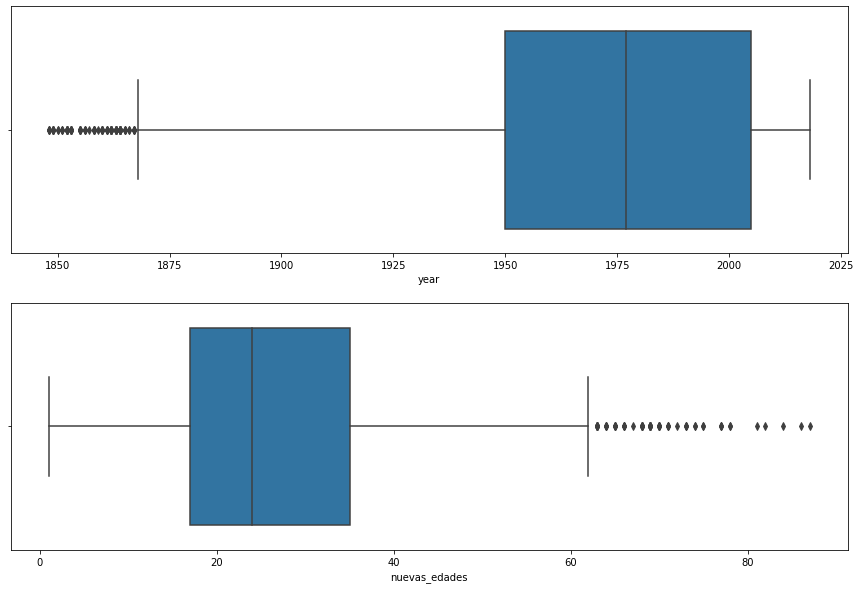

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

3- Identifica sobre el dataframe las filas que son outliers

In [43]:
# cálculo del Q1 para columna year
Q1y = np.percentile(df['year'], 25)
Q1y

1950.0

In [44]:
# cálculo del Q3 para columna year
Q3y = np.percentile(df['year'], 75)
Q3y

2005.0

In [45]:
#calculemos el IQR 

IQRy = Q3y - Q1y
IQRy

55.0

In [46]:
# multiplicamos el IQR por 1.5

outlier_step_y= 1.5 * IQRy
outlier_step_y

82.5

In [47]:
outliers_data = df[(df['year'] < Q1y - outlier_step_y) | (df["year"] > Q3y + outlier_step_y)]
outliers_data.sample(20)

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
6133,1860.12.26,1860,australia,Bathing,NaN,NaN,26-Dec-1860,Dec,n,M,NaN
6089,1865.03.01.R,1865,south africa,Fishing,NaN,NaN,Reported 01-Mar-1865,Mar,y,M,NaN
6082,1867.06.26,1867,cuba,boat from ship Josephine capsized in squall,NaN,NaN,26-Jun-1867,Jun,y,M,NaN
6186,1849.06.08.b,1849,usa,Attempting to rescue woman seized by shark,NaN,NaN,08-Jun-1849,Jun,y,M,NaN
6084,1867.00.00,1867,cuba,Painting a ship,NaN,NaN,1867,NaN,y,M,NaN
6175,1852.01.22,1852,new zealand,Swimming,NaN,Unspecified,"""Anniversary Day"" 22-Jan-1850 or 1852",Jan,y,M,NaN
6178,1851.03.08.R,1851,usa,Swimming,NaN,NaN,Mar-1851,Mar,y,M,NaN
6184,1849.10.04,1849,peru,Swimming,NaN,NaN,04-Oct-1849,Oct,y,M,NaN
6188,1849.01.27,1849,australia,boat capsized,NaN,Unspecified,27-Jan-1849,Jan,NaN,M,NaN
6187,1849.06.08.a,1849,usa,Bathing,NaN,NaN,08-Jun-1849,Jun,y,F,NaN


In [48]:
# cálculo del Q1 para columna nuevas edades

Q1e = np.nanpercentile(df['nuevas_edades'], 25)
Q1e

17.0

In [49]:
# cálculo del Q3 para columna nuevas edades
Q3e = np.nanpercentile(df['nuevas_edades'], 75)
Q3e

35.0

In [50]:
#calculemos el IQR 

IQRe = Q3e - Q1e
IQRe

18.0

In [51]:
# multiplicamos el IQR por 1.5

outlier_step_e= 1.5 * IQRe
outlier_step_e

27.0

In [52]:
outliers_data_e = df[(df['nuevas_edades'] < Q1e - outlier_step_e) | (df["nuevas_edades"] > Q3e + outlier_step_e)]
outliers_data_e.head()

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
207,2018.03.09.b,2018,australia,Swimming,69,Unspecified,9-Mar-2018,Mar,n,M,69.0
270,2017.08.23,2017,usa,SUP,69,White,23-Aug-2017,Aug,n,M,69.0
300,2017.06.17,2017,spain,Swimming,82,NaN,17-Jun-2017,Jun,n,M,82.0
311,2017.05.27,2017,australia,Fishing,73,NaN,27-May-2017,May,n,M,73.0
329,2017.04.12.a,2017,south africa,Scuba Diving,68,Unspecified,12-Apr-2017,Apr,NaN,M,68.0


In [53]:
df['nuevas_edades'].unique()

array([nan, 14., 19., 20., 15., 21., 27., 36., 25.,  6., 16., 50., 13.,
       57., 11., 48., 18., 52., 12., 32., 10., 34., 30., 60., 33., 29.,
       54., 41., 37., 56., 69., 38., 55., 35., 46., 45., 40., 28., 24.,
       26., 49., 22.,  7., 31., 17., 42.,  3.,  8., 82., 73., 68., 51.,
       39., 58., 47., 61., 65., 66., 43.,  9., 72., 59., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1.,  2., 81., 78.])

4- Reemplaza los outliers por el estadístico más correcto.

In [24]:
# en la columna year vamos a reemplazar los outliers por la mediana

In [25]:
# En el paso anterior, probamos a hacer el código fuera de la función, paso a paso y ahora cogimos la función de los apuntes

In [54]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    
    return dicc_indices

In [55]:
ind = detectar_outliers(df_numericas, df)
ind

{'year': [4697,
  6080,
  6081,
  6082,
  6083,
  6084,
  6085,
  6086,
  6087,
  6088,
  6089,
  6090,
  6091,
  6092,
  6093,
  6094,
  6095,
  6096,
  6097,
  6098,
  6099,
  6100,
  6101,
  6102,
  6103,
  6104,
  6105,
  6106,
  6107,
  6108,
  6109,
  6110,
  6111,
  6112,
  6113,
  6114,
  6115,
  6116,
  6117,
  6118,
  6119,
  6120,
  6121,
  6122,
  6123,
  6124,
  6125,
  6126,
  6127,
  6128,
  6129,
  6130,
  6131,
  6132,
  6133,
  6134,
  6135,
  6136,
  6137,
  6138,
  6139,
  6140,
  6141,
  6142,
  6143,
  6144,
  6145,
  6146,
  6147,
  6148,
  6149,
  6150,
  6151,
  6152,
  6153,
  6154,
  6155,
  6156,
  6157,
  6158,
  6159,
  6160,
  6161,
  6162,
  6163,
  6164,
  6165,
  6166,
  6167,
  6168,
  6169,
  6170,
  6171,
  6172,
  6173,
  6174,
  6175,
  6176,
  6177,
  6178,
  6179,
  6180,
  6181,
  6182,
  6183,
  6184,
  6185,
  6186,
  6187,
  6188,
  6189,
  6190,
  6191],
 'nuevas_edades': [207,
  270,
  300,
  311,
  329,
  366,
  367,
  374,
  404,
  435,


In [56]:
df['nuevas_edades'].unique()

array([nan, 14., 19., 20., 15., 21., 27., 36., 25.,  6., 16., 50., 13.,
       57., 11., 48., 18., 52., 12., 32., 10., 34., 30., 60., 33., 29.,
       54., 41., 37., 56., 69., 38., 55., 35., 46., 45., 40., 28., 24.,
       26., 49., 22.,  7., 31., 17., 42.,  3.,  8., 82., 73., 68., 51.,
       39., 58., 47., 61., 65., 66., 43.,  9., 72., 59., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1.,  2., 81., 78.])

In [57]:
for v in ind["year"]:
   mediana = df["year"].median()
   df['year'].replace(df.iloc[v]["year"],mediana, inplace=True)


In [58]:
mediana

1977.0

In [59]:
np.set_printoptions(suppress=True)

- Hemos decidido trabajar con los outliers por encima de Q3+IQR dado que el boxplot nos indica que solo tenemos outliers en esa franja de edades.

In [60]:
outliers_data_mayores = df[(df["nuevas_edades"] > Q3e + outlier_step_e)]
outliers_data_mayores.head()

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
207,2018.03.09.b,2018,australia,Swimming,69,Unspecified,9-Mar-2018,Mar,n,M,69.0
270,2017.08.23,2017,usa,SUP,69,White,23-Aug-2017,Aug,n,M,69.0
300,2017.06.17,2017,spain,Swimming,82,NaN,17-Jun-2017,Jun,n,M,82.0
311,2017.05.27,2017,australia,Fishing,73,NaN,27-May-2017,May,n,M,73.0
329,2017.04.12.a,2017,south africa,Scuba Diving,68,Unspecified,12-Apr-2017,Apr,NaN,M,68.0


In [65]:
media_mayores=int(outliers_data_mayores['nuevas_edades'].mean())
media_mayores


69

In [66]:
for v in ind["nuevas_edades"]:
   df['nuevas_edades'].replace(df.iloc[v]["nuevas_edades"],media_mayores, inplace=True)


In [67]:
df['nuevas_edades'].unique()

array([nan, 14., 19., 20., 15., 21., 27., 36., 25.,  6., 16., 50., 13.,
       57., 11., 48., 18., 52., 12., 32., 10., 34., 30., 60., 33., 29.,
       54., 41., 37., 56., 69., 38., 55., 35., 46., 45., 40., 28., 24.,
       26., 49., 22.,  7., 31., 17., 42.,  3.,  8., 51., 39., 58., 47.,
       61., 43.,  9., 59., 23., 44., 62., 53.,  5.,  1.,  2.])

5- Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [70]:
df.to_csv("../Ficheros/attack_limpieza3.csv")